<a href="https://www.kaggle.com/code/kamalapousajja/iris-species-prediction?scriptVersionId=151960393" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Iris species prediction 

This Iris dataset contains information about iris species classification by sepal and petal size. 

Machine learning model is needed in order to classify the appropriate iris species based on sepal and petal size.

The list of algorithms in this project include:

* Support Vector Machine
* Logistic regression
* Naive Bayes Classifier
* Decision tree
* Random forest
* K-nearest Neighbors


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', color_codes=True)


In [2]:
# Load data

iris = pd.read_csv('/kaggle/input/iris/Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check the information of the data

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Check the missing value

iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Check the duplicate value

iris.duplicated().sum()

0

In [6]:
# Remove unneccessary column

iris.drop('Id',axis=1,inplace=True) 

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Check for how many types of species

Species = iris['Species'].unique()
Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are three types of species

* Iris-setosa
* Iris-versicolor
* Iris-virginica

In [8]:
# Summary of the statistical information

iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis

<Axes: xlabel='Species', ylabel='count'>

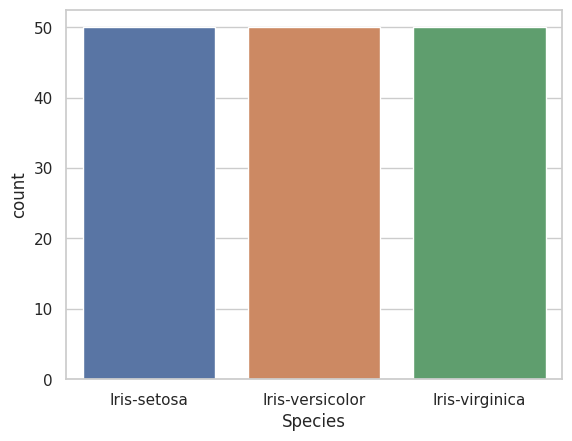

In [9]:
# Create a bar chart to see how many examples we have of each species

sns.countplot(data=iris, x='Species')

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

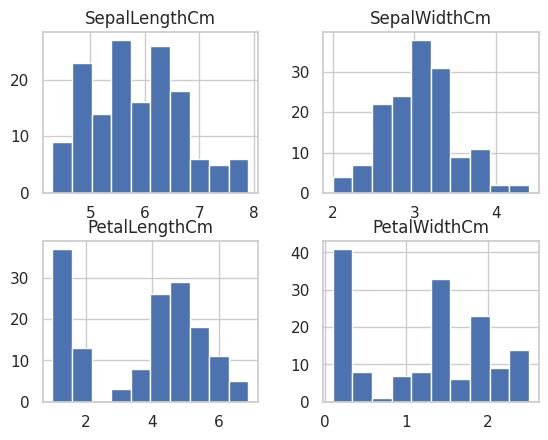

In [10]:
# Create histogram to see univariate distributions of each feature 

iris.hist()

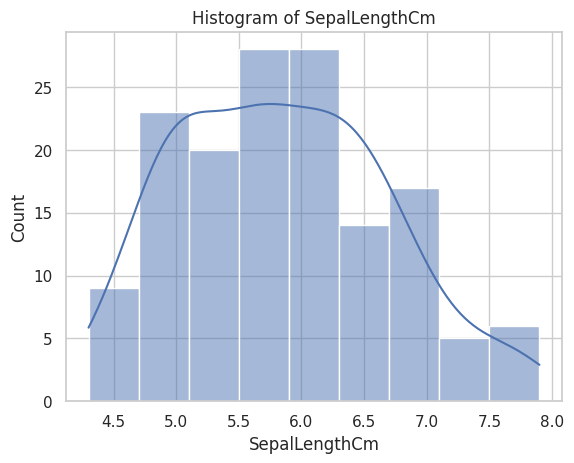

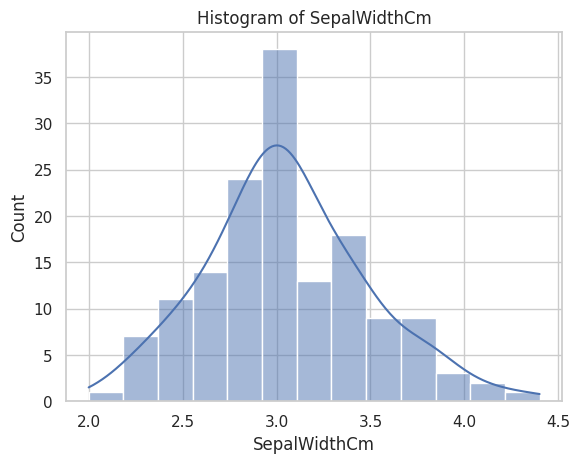

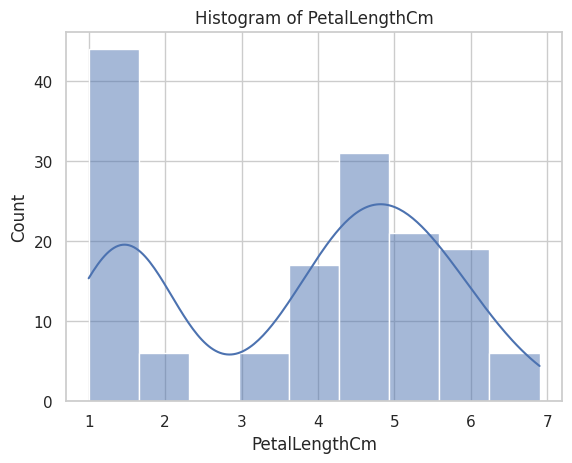

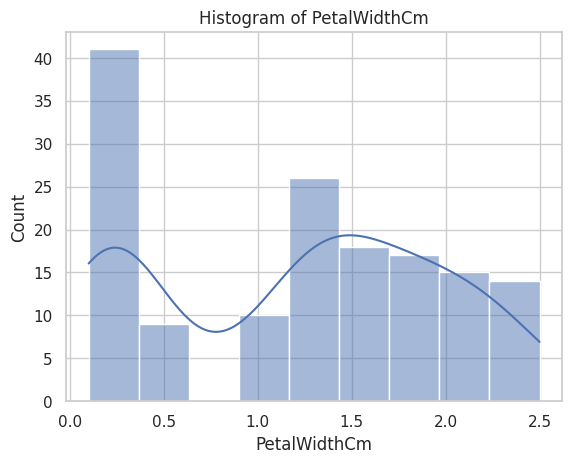

In [11]:
# Create histogram and kde to see univariate distributions of each feature 

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    sns.histplot(data=iris, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

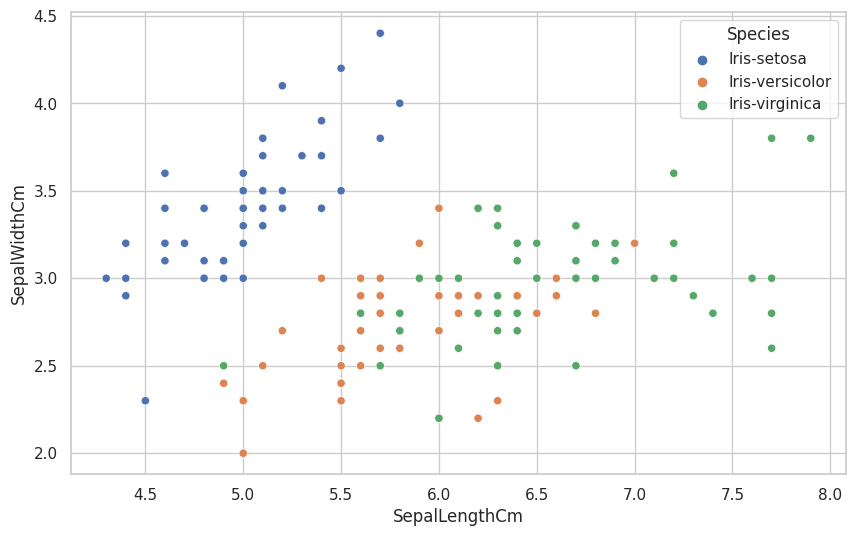

In [12]:
# Create a scatterplot of the Iris features

plt.figure(figsize=(10,6)) 

sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

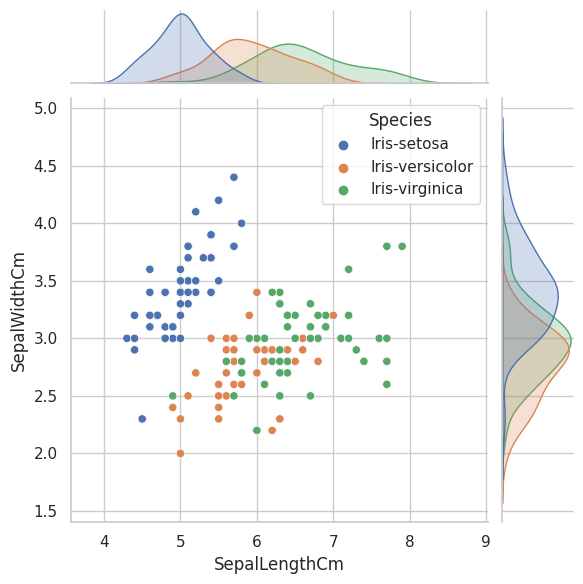

In [13]:
# Try to use the seaborn's jointplot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species')

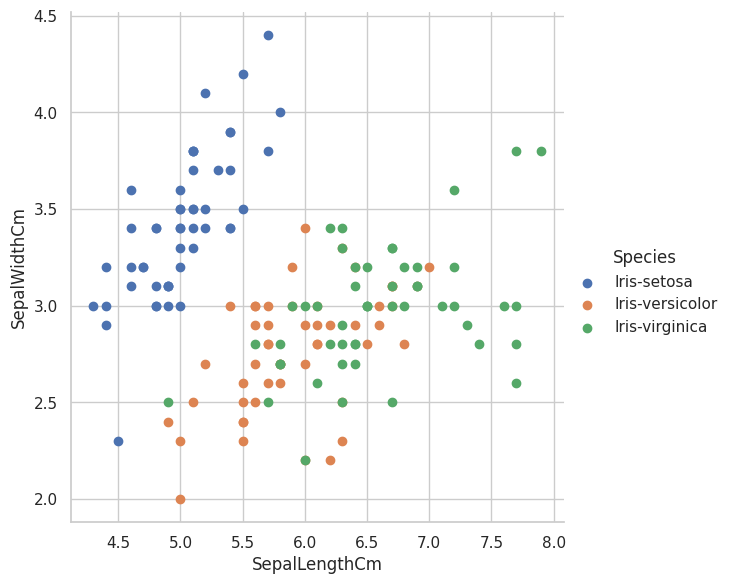

In [14]:
# Try to use seaborn's FacetGrid 

sns.FacetGrid(iris, hue='Species', height=6) \
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
   .add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

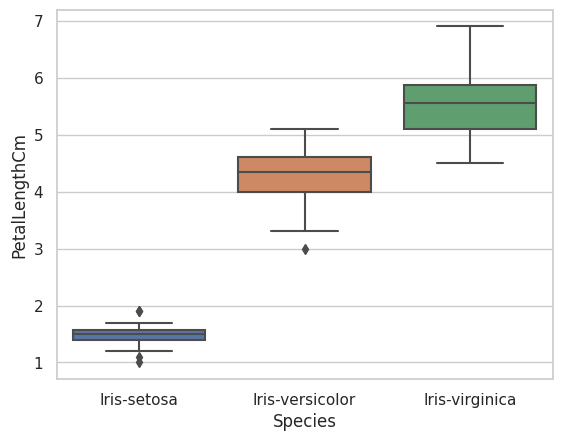

In [15]:
# Create a boxplot to look at an individual feature 

sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

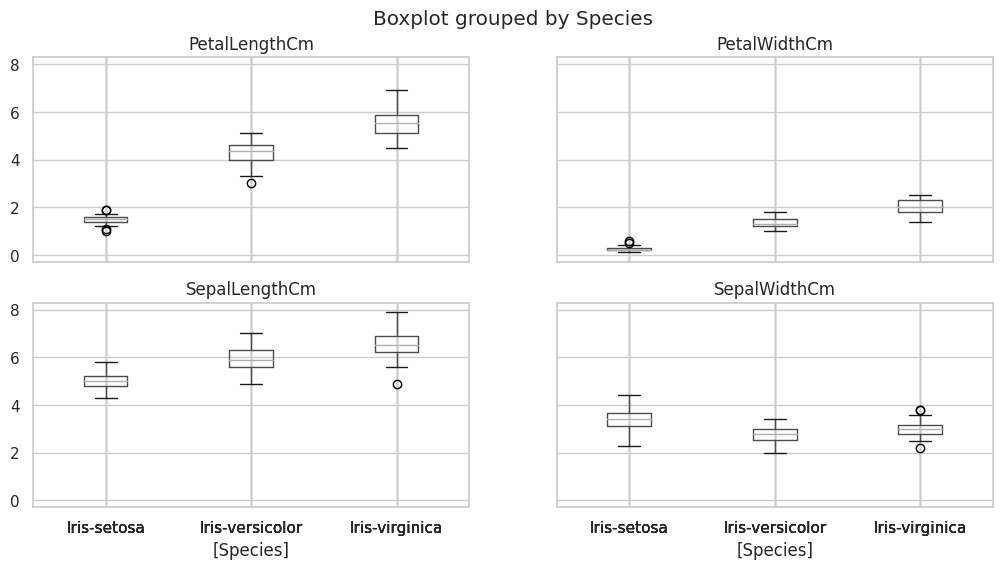

In [16]:
# We can quickly make a boxplot with Pandas on each feature split out by species

iris.boxplot(by='Species', figsize=(12, 6))

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

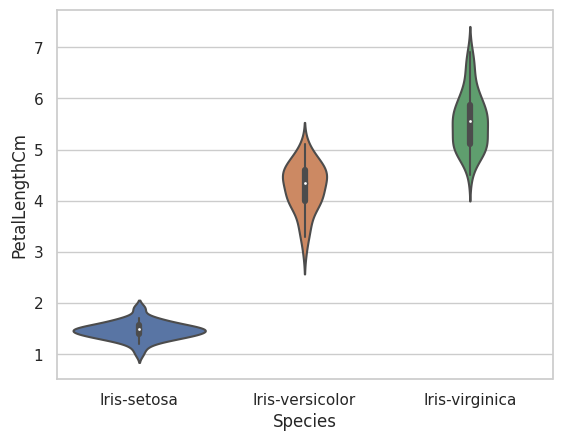

In [17]:
# Create a violinplot to look at an individual feature 

sns.violinplot(x='Species', y='PetalLengthCm', data=iris)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

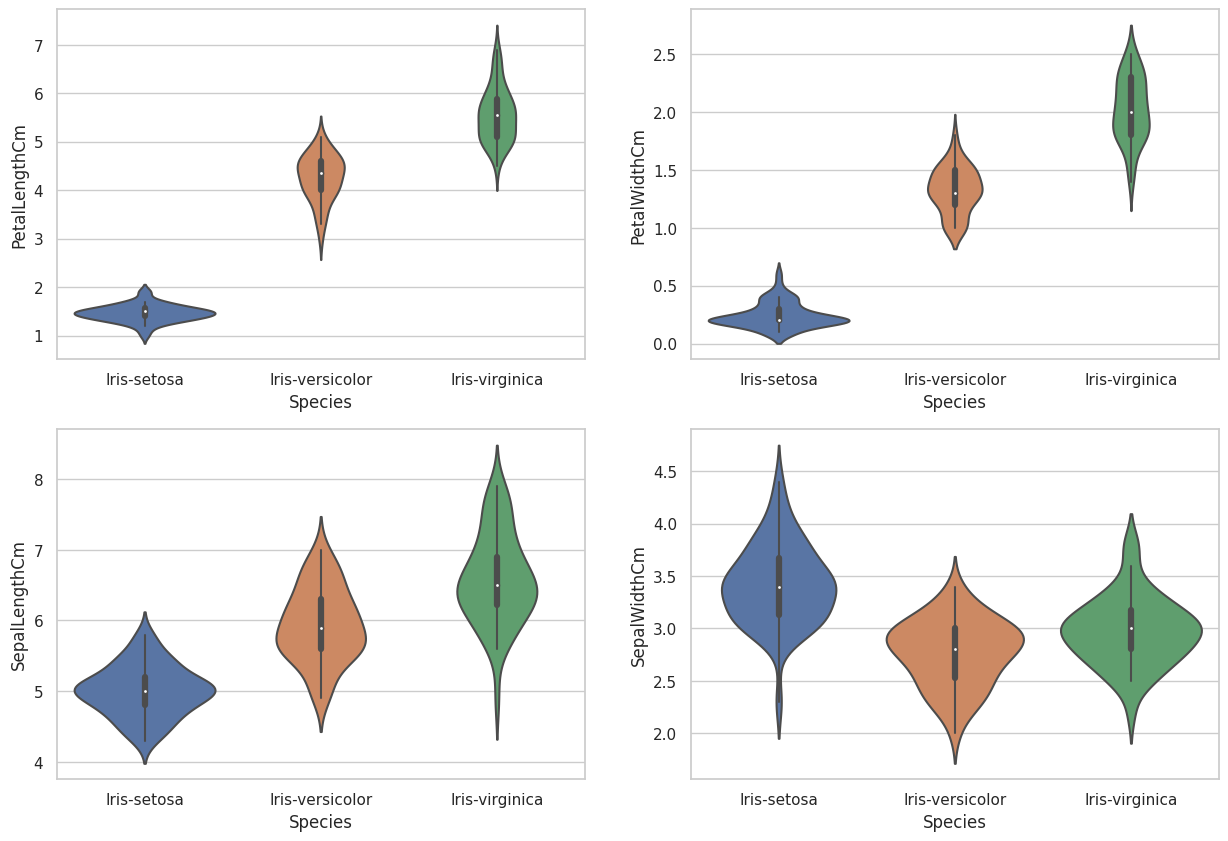

In [18]:
#Try to use subplot function

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

<Axes: >

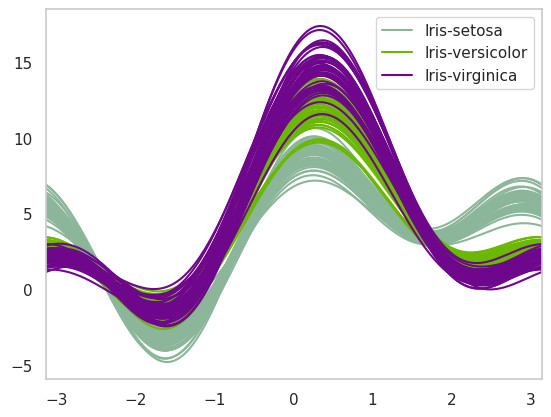

In [19]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series

from pandas.plotting import andrews_curves

andrews_curves(iris, 'Species')

<Axes: >

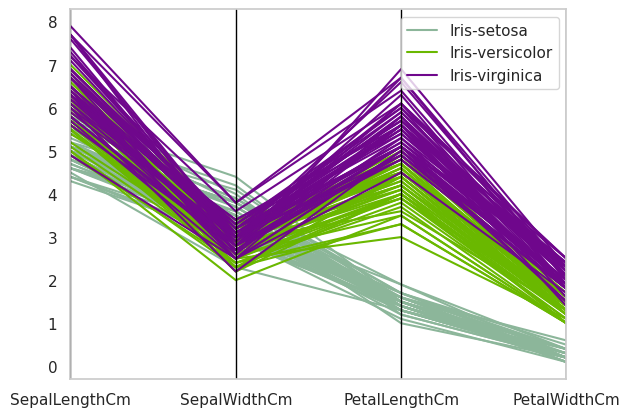

In [20]:
# Another multivariate visualization technique pandas has is 'parallel_coordinates'
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample

from pandas.plotting import parallel_coordinates

parallel_coordinates(iris, 'Species')

<Axes: >

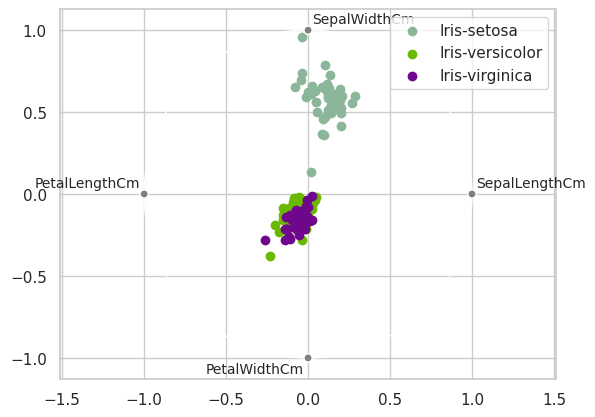

In [21]:
# Another multivariate visualization technique pandas has is 'radviz'
# Which puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature

from pandas.plotting import radviz

radviz(iris, 'Species')

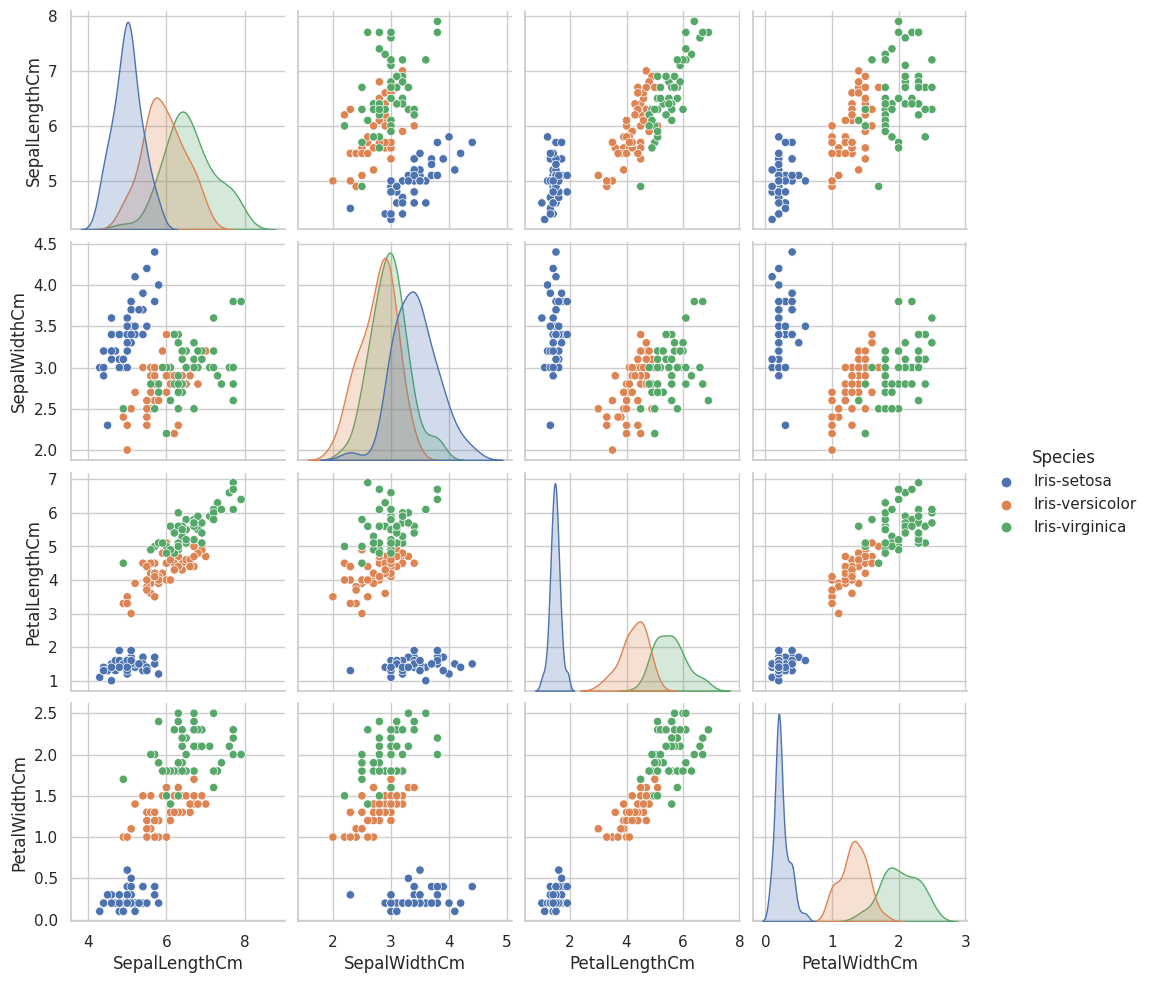

In [22]:
# Create pairplot, which shows the bivariate relation between each pair of features
    
sns.pairplot(iris, hue='Species', diag_kind='kde')

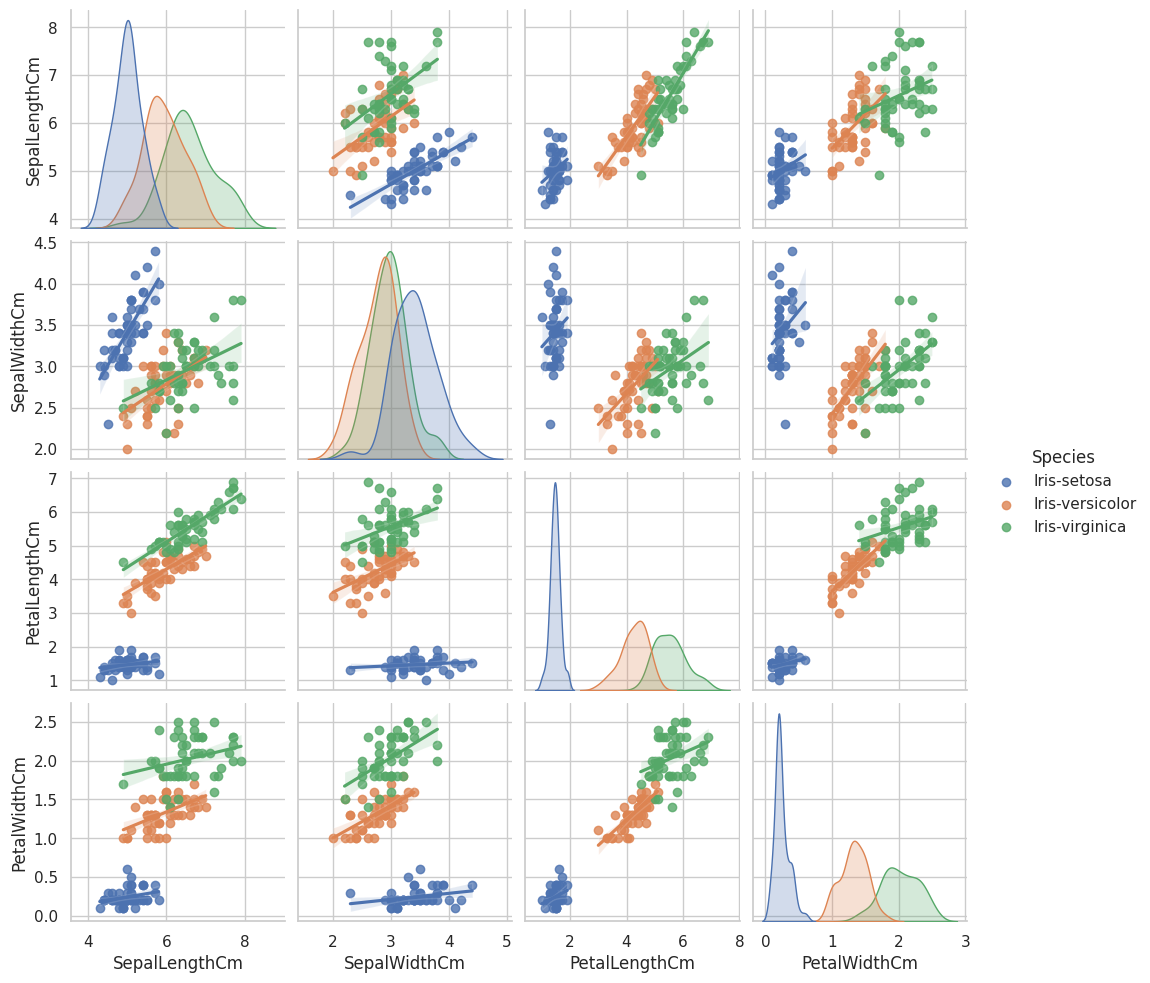

In [23]:
# Create pairplot with regression lines

sns.pairplot(data=iris, kind='reg', hue='Species')

# Train Test Split

In [24]:
# Split data into a training set and a testing set

from sklearn.model_selection import train_test_split

X = iris.drop('Species',axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 101)


# List of algorithms

Since it is a classification problem we will be using

* Support Vector Machine
* Logistic regression
* Naive Bayes Classifier
* Decision tree
* Random forest
* K-nearest Neighbors

# Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

svc_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,svc_predict))
print(confusion_matrix(y_test,svc_predict))
print('The accuracy of SVM is',accuracy_score(svc_predict,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
The accuracy of SVM is 0.9777777777777777


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lo_model = LogisticRegression()
lo_model.fit(X_train,y_train)

lo_predict = lo_model.predict(X_test)

print(classification_report(y_test,lo_predict))
print(confusion_matrix(y_test,lo_predict))
print('The accuracy of Logistic Regression is',accuracy_score(lo_predict,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
The accuracy of Logistic Regression is 0.9777777777777777


# Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

nb_predict = nb_model.predict(X_test)

print(classification_report(y_test,nb_predict))
print(confusion_matrix(y_test,nb_predict))
print('The accuracy of Naive Bayes Classification is',accuracy_score(nb_predict,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
The accuracy of Naive Bayes Classification is 0.9555555555555556


# Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(X_train,y_train)

dt_predict = nb_model.predict(X_test)

print(classification_report(y_test,dt_predict))
print(confusion_matrix(y_test,dt_predict))
print('The accuracy of Decision tree is',accuracy_score(dt_predict,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
The accuracy of Decision tree is 0.9555555555555556


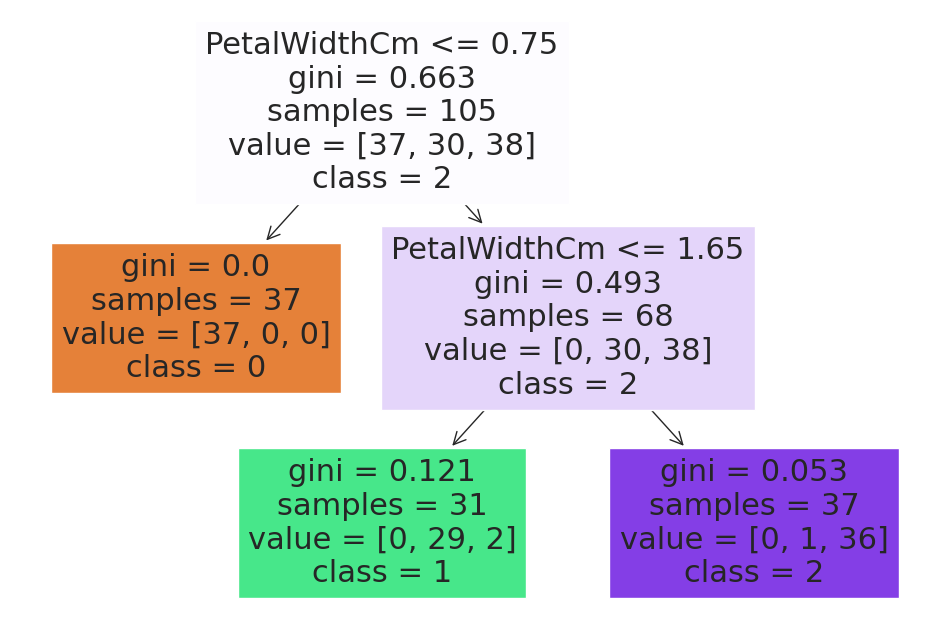

In [29]:
# Create Decision Tree Visualization

from sklearn import tree

feature_names = X_train.columns
target_names = ['0','1','2']

fig = plt.figure(figsize=(12,8))

plot = tree.plot_tree(
    dt_model,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)

plt.show()

# for save tree plot
# fig.savefig('Tree.png')

# Random Forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(X_train,y_train)
rfc_predict = rfc_model.predict(X_test)

print(classification_report(y_test,dt_predict))
print(confusion_matrix(y_test,dt_predict))
print('The accuracy of Random Forest is',accuracy_score(rfc_predict,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
The accuracy of Random Forest is 0.9555555555555556


# K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)

print(classification_report(y_test,knn_predict))
print(confusion_matrix(y_test,knn_predict))
print('The accuracy of KNN is',accuracy_score(knn_predict,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
The accuracy of KNN is 1.0


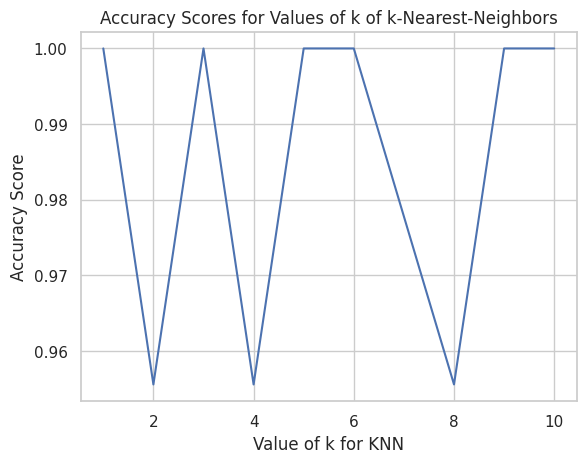

In [32]:
# Experimenting with different k values

k_range = list(range(1,11))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_pred, y_test))
    
plt.plot(k_range, scores)

plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# Model Comparison

In [33]:
# Create accuracy comparison table 

compare = pd.DataFrame({'Model': ['Logistic Regression', 
                                  'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 
                                  'Decision Tree',
                                  'Random Forest',
                                  'K-Nearest Neighbour'], 
                        'Accuracy': [accuracy_score(lo_predict,y_test),
                                     accuracy_score(svc_predict,y_test),
                                     accuracy_score(nb_predict,y_test),
                                     accuracy_score(dt_predict,y_test),
                                     accuracy_score(rfc_predict,y_test),
                                     accuracy_score(knn_predict,y_test),]})

compare.sort_values(by = 'Accuracy', ascending = False)


,Model,Accuracy
5,K-Nearest Neighbour,1.000000
0,Logistic Regression,0.977778
1,Support Vector Machine,0.977778
2,Gaussian Naive Bayes,0.955556
3,Decision Tree,0.955556
4,Random Forest,0.955556


# Prediction on the new Iris flower data

**For example**, there is new iris flower data that is not available in the dataset. 

I would like to predict the species of the new iris flower
* Sepal Length (cm)  : 5.5
* Sepal Width (cm)   : 4.4
* Petal Length (cm)  : 3.3
* Petal Width (cm)   : 2.2

In [34]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# Create a new dataframe 

new_data = pd.DataFrame(data = [[5.5, 4.4, 3.3, 2.2]], 
                        columns = ['SepalLengthCm', 
                                   'SepalWidthCm', 
                                   'PetalLengthCm', 
                                   'PetalWidthCm'])
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.5,4.4,3.3,2.2


In [36]:
# Predict the species of the new iris flower

new_predict = knn_model.predict(new_data)

confidence = knn_model.predict_proba(new_data)

print(f'The species of this new Iris flower is {new_predict[0]} with {confidence[0][1]*100} % confidence.') 

The species of this new Iris flower is Iris-versicolor with 100.0 % confidence.
